<a href="https://colab.research.google.com/github/msrana172/The-Sparks-Foundation-Internship-Task/blob/main/The_Sparks_Foundation_Internship_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Prediction using Unsupervised ML**

####***Created By-*** **Mahaveer Singh**

**Task 2** - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

####Importing all required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [3]:
df=pd.read_csv("Iris.csv")
df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Check the species
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
#Let's describe the dataset like what is the mean, standard-deviation and other values.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Let's check the shape of the data frame i.e no of rows and columns
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

####**Data Visualization** 

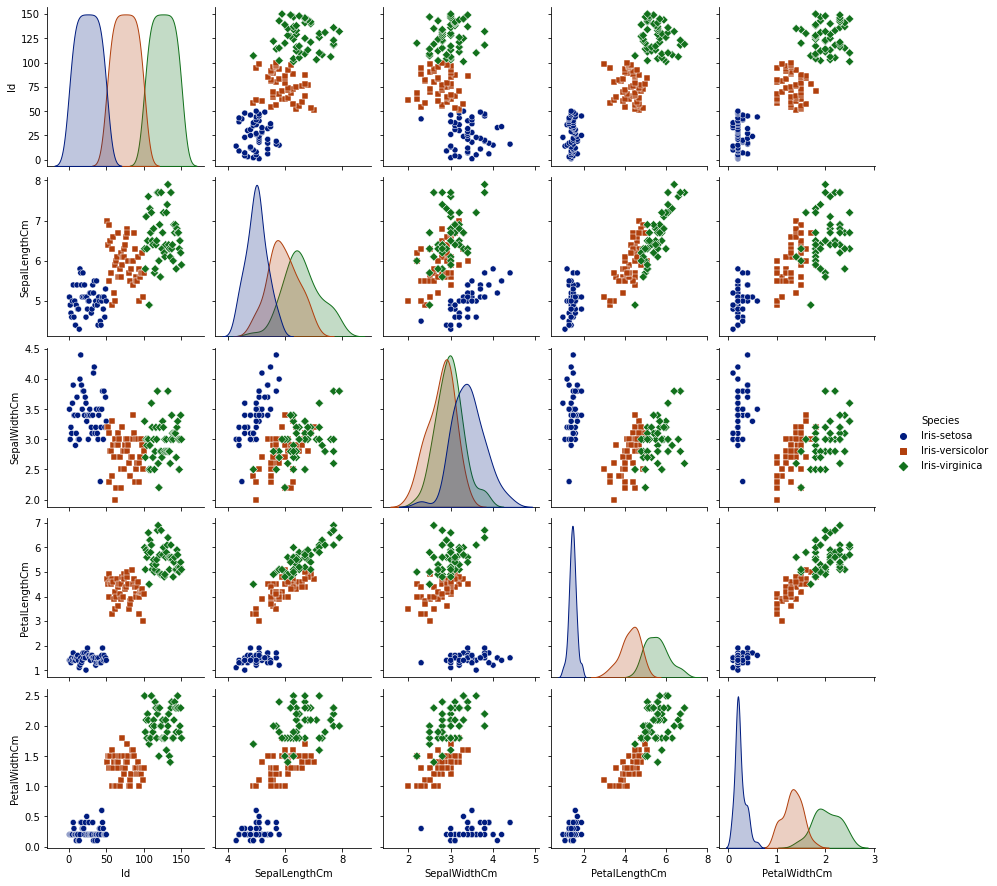

In [9]:
sns.pairplot(df, hue = 'Species', palette = 'dark', markers = ['o','s','D'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


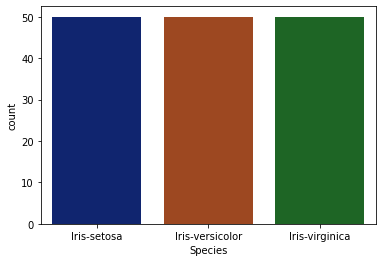

In [10]:
sns.countplot(df['Species'], palette = 'dark')
plt.show()

In [11]:
X = df.iloc[:, [0, 1, 2, 3]].values
y = df.iloc[:, -1].values

####**Find the best k-value using Elbow Method**

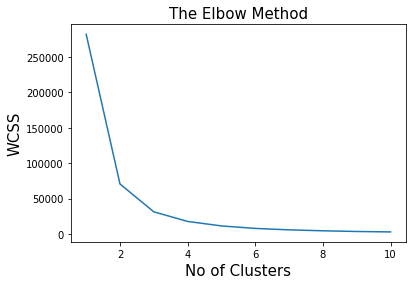

In [12]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title("The Elbow Method", fontsize = 15)
plt.xlabel("No of Clusters",fontsize = 15)
plt.ylabel("WCSS" ,fontsize = 15)
plt.show()

In [13]:
#K-Means model k=3
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### **Visualising the clusters**

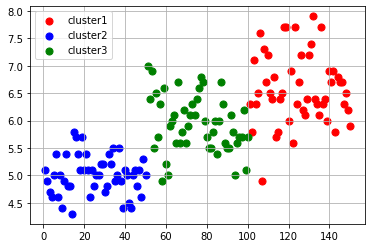

In [14]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=50, c = 'red', label = 'cluster1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=50, c = 'blue', label = 'cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=50, c = 'green', label = 'cluster3')
plt.legend()
plt.grid()
plt.show()

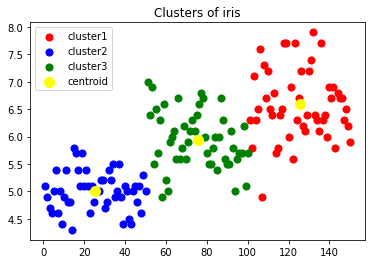

In [15]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=50, c = 'red', label = 'cluster1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=50, c = 'blue', label = 'cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=50, c = 'green', label = 'cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100,c = "yellow", label = "centroid")
plt.title("Clusters of iris")
plt.legend()
plt.show()